# **Data Cleaning**

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [173]:
#Read the csv file into a DataFrame(df)
df = pd.read_csv('/content/data01.csv')
#Displays the first few rows of the Dataset
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [174]:
#gives shape( rows and columns ) of dataset
#returns tuple type
print(df.shape)
#checks for missing values "null" and "NaN" and returns the total in each column
print(df.isnull().sum())

(1177, 51)
group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 1

In [175]:
#Removes rows with missing 'outcome' values, it will not help us determine mortality rate
#inplace=True modifies df directly instead of creating a new df
df.dropna(subset = ['outcome'], inplace=True)
# Removes duplicate rows ( 1st occurrence is kept )
df.drop_duplicates()
# drops the group and ID columns (not relevant for our analysis)
# axis = 1 means drop column
df = df.drop(['group','ID'] , axis = 1)

In [176]:
#returns boolean df where True -> Nan for each column
# sum() counts True values
nan_counts = df.isna().sum()

# Print NaN counts by column
print("NaN counts by column:")
print(nan_counts)

# Print the percentage of NaN values in each column
total_rows = df.shape[0]
nan_percentages = (nan_counts / total_rows) * 100
print("\nNaN percentages by column:")
print(nan_percentages)

NaN counts by column:
outcome                       0
age                           0
gendera                       0
BMI                         214
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   12
Systolic blood pressure      15
Diastolic blood pressure     15
Respiratory rate             12
temperature                  18
SP O2                        12
Urine output                 35
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocyte        

In [177]:
#dropping columns with NaN values percentage greater than 20
perc = 20.0
min_count = int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna(axis=1, thresh=min_count)

In [178]:
# Fill NaN values with the mean of each column
df = df.fillna(df.mean())

In [179]:
# Checking if we were able to fill the NaN values with the mean
nan_counts = df.isna().sum()

# Print NaN counts by column
print("NaN counts by column:")
print(nan_counts)

NaN counts by column:
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP         

In [180]:
# checking for any null values
df.isnull().sum()

outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP                   0
Creatine k

In [181]:
# this column was in terms of 1 and 2, easier to analyse in terms on '0' and '1'
df['gendera'] = df['gendera'] - 1
df['gendera']

0       0
1       1
2       1
3       1
4       1
       ..
1172    0
1173    0
1174    1
1175    1
1176    0
Name: gendera, Length: 1176, dtype: int64

# **Data Transformation**

In [182]:
df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,Lactic acid,EF
0,0.0,72,0,37.588179,0,0,0,1,1,0,...,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,21.166667,0.5,55
1,0.0,75,1,30.188278,0,0,0,0,1,0,...,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,33.444444,0.5,55
2,0.0,83,1,26.572634,0,0,0,0,1,0,...,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,30.571429,0.5,35
3,0.0,43,1,83.264629,0,0,0,0,0,0,...,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,38.571429,0.6,55
4,0.0,75,1,31.824842,1,0,0,0,1,0,...,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,22.000000,0.6,55


*we will use MinMax Normalization for our dataset, Standardization is another possible option*

**Normalization**

In [183]:
# to get columns of numeric type/ continuous variables
df_continuous = df.drop(['outcome', 'gendera', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD'],axis=1)
numerical_columns = df_continuous.select_dtypes(include='number').columns.tolist()
print(numerical_columns)

['age', 'BMI', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte', 'Platelets', 'Neutrophils', 'Lymphocyte', 'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'Bicarbonate', 'Lactic acid', 'EF']


In [184]:
from sklearn.preprocessing import MinMaxScaler
#minmax transforms data to a range between 0 and 1
# Initialize MinMaxScaler
scaler = MinMaxScaler()
#df_minmax stores new data
df_minmax = df.copy()
# Apply Min-Max scaling to numerical columns
df_minmax[numerical_columns] = scaler.fit_transform(df_minmax[numerical_columns])

In [185]:
# Print the first few rows of the DataFrame to inspect the scaled numerical column
df_minmax.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,Lactic acid,EF
0,0.0,0.6625,0,0.264576,0,0,0,1,1,0,...,0.138069,0.509346,0.601029,0.179679,0.683867,0.346185,0.455782,0.238714,0.000000,0.666667
1,0.0,0.7000,1,0.183812,0,0,0,0,1,0,...,0.232659,0.406542,0.604495,0.344118,0.430145,0.254886,0.182398,0.591427,0.000000,0.666667
2,0.0,0.8000,1,0.144350,0,0,0,0,1,0,...,0.236976,0.792056,0.650050,0.368627,0.605553,0.178313,0.283285,0.508892,0.000000,0.333333
3,0.0,0.3000,1,0.763099,0,0,0,0,0,0,...,0.177252,0.388785,0.594790,0.653394,0.279339,0.303270,0.203110,0.738714,0.012766,0.666667
4,0.0,0.7000,1,0.201673,1,0,0,0,1,0,...,0.227622,0.500000,0.549037,0.478431,0.573439,0.452209,0.093537,0.262654,0.012766,0.666667


In [186]:
df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,Lactic acid,EF
0,0.0,72,0,37.588179,0,0,0,1,1,0,...,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,21.166667,0.5,55
1,0.0,75,1,30.188278,0,0,0,0,1,0,...,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,33.444444,0.5,55
2,0.0,83,1,26.572634,0,0,0,0,1,0,...,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,30.571429,0.5,35
3,0.0,43,1,83.264629,0,0,0,0,0,0,...,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,38.571429,0.6,55
4,0.0,75,1,31.824842,1,0,0,0,1,0,...,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,22.000000,0.6,55


**Standardization**

ensures that the features have a mean of 0 and standard deviation of 1

It is not bounded to a specific range and less affected by outliers

In [187]:
from sklearn.preprocessing import StandardScaler
# transforms data by (data - mean)/std
# Initialize StandardScaler
scaler = StandardScaler()
df_Standard = df.copy()
# Apply StandardScaler to numerical columns
df_Standard[numerical_columns] = scaler.fit_transform(df_Standard[numerical_columns])

In [188]:
df_Standard.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,Lactic acid,EF
0,0.0,-0.152449,0,8.777536e-01,0,0,0,1,1,0,...,-0.668514,1.543622,-0.035472,-1.817503,1.289242,-0.285442,1.979700,-1.111844,-1.53302,0.488840
1,0.0,0.070906,1,4.214120e-16,0,0,0,0,1,0,...,-0.025373,0.659589,-0.001959,-0.593996,-0.721566,-0.934765,-0.925586,1.264118,-1.53302,0.488840
2,0.0,0.666520,1,-4.288766e-01,0,0,0,0,1,0,...,0.003982,3.974710,0.438489,-0.411630,0.668586,-1.479359,0.146549,0.708140,-1.53302,-1.065508
3,0.0,-2.311548,1,6.295754e+00,0,0,0,0,0,0,...,-0.402095,0.506893,-0.095794,1.707177,-1.916740,-0.590654,-0.705479,2.256278,-1.41975,0.488840
4,0.0,0.070906,1,1.941242e-01,1,0,0,0,1,0,...,-0.059621,1.463255,-0.538157,0.405368,0.414072,0.468611,-1.869917,-0.950579,-1.41975,0.488840


# **Data Sampling**

*we will use Stratified Sampling for our dataset, Random Sampling(with/ without replacement) is another possible option*

In [189]:
df = df_minmax
df_sampling = df.copy()
df_sampling.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,Lactic acid,EF
0,0.0,0.6625,0,0.264576,0,0,0,1,1,0,...,0.138069,0.509346,0.601029,0.179679,0.683867,0.346185,0.455782,0.238714,0.000000,0.666667
1,0.0,0.7000,1,0.183812,0,0,0,0,1,0,...,0.232659,0.406542,0.604495,0.344118,0.430145,0.254886,0.182398,0.591427,0.000000,0.666667
2,0.0,0.8000,1,0.144350,0,0,0,0,1,0,...,0.236976,0.792056,0.650050,0.368627,0.605553,0.178313,0.283285,0.508892,0.000000,0.333333
3,0.0,0.3000,1,0.763099,0,0,0,0,0,0,...,0.177252,0.388785,0.594790,0.653394,0.279339,0.303270,0.203110,0.738714,0.012766,0.666667
4,0.0,0.7000,1,0.201673,1,0,0,0,1,0,...,0.227622,0.500000,0.549037,0.478431,0.573439,0.452209,0.093537,0.262654,0.012766,0.666667


In [190]:
#Sample 150 random items without replacement
random_sampled_df = df_sampling.sample(150)
# random_sampled_df is a subset of the original df
random_sampled_df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,Lactic acid,EF
366,1.0,0.8125,1,0.183812,1,0,0,1,0,0,...,0.191174,0.285472,0.600462,0.203922,0.563759,0.380723,0.291837,0.346226,0.150638,0.583333
255,0.0,0.5875,0,0.150629,1,0,0,0,1,0,...,0.215389,0.480949,0.630304,0.256863,0.372302,0.745134,0.258787,0.430601,0.114894,0.166667
418,1.0,0.8125,0,0.178323,0,1,0,0,0,0,...,0.211072,0.311526,0.490806,0.573529,0.367043,0.370482,0.467687,0.478112,0.165957,0.250000
54,0.0,0.7000,1,0.183812,1,0,1,1,1,0,...,0.172695,0.271963,0.682137,0.349020,0.717785,0.317470,0.386621,0.287791,0.051064,0.583333
612,0.0,0.8625,1,0.256691,1,1,0,0,0,0,...,0.185167,0.224299,0.669658,0.403922,0.614850,0.350602,0.294643,0.377565,0.353191,0.666667


In [191]:
#Sample 150 random items with replacement
random_sampled_replacement_df = df_sampling.sample(150,replace=True)
#contains a different subset of the original data where rows can be repeated
random_sampled_replacement_df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,Lactic acid,EF
619,1.0,0.4500,0,0.183812,1,1,0,0,0,0,...,0.150389,0.720794,0.303634,0.520124,0.176094,0.896185,0.553348,0.236320,0.363121,1.000000
39,0.0,0.6625,1,0.204202,0,0,0,1,1,0,...,0.204955,0.204673,0.757005,0.498824,0.599469,0.162410,0.374150,0.593023,0.042553,0.583333
656,0.0,0.8375,0,0.104186,1,0,0,1,0,0,...,0.609869,0.350467,0.571913,0.576471,0.321031,0.469880,0.289116,0.552804,0.523404,0.166667
605,1.0,0.9125,1,0.054371,1,1,0,1,0,0,...,0.399803,0.170773,0.811455,0.294118,0.731552,0.597590,0.467687,0.254819,0.321702,0.500000
746,0.0,0.7375,1,0.215735,1,0,1,0,1,1,...,0.421903,0.283178,0.571220,0.544118,0.451179,0.337349,0.224490,0.470132,0.172778,0.333333


**Stratified Sampling**

A method that involves dividing a population into homogeneous subpopulations (called strata) based on specific characteristics

Stratified sampling ensures that we maintain the proportion of each outcome in the sampled data.

[0. 1.] [1017  159]


[]

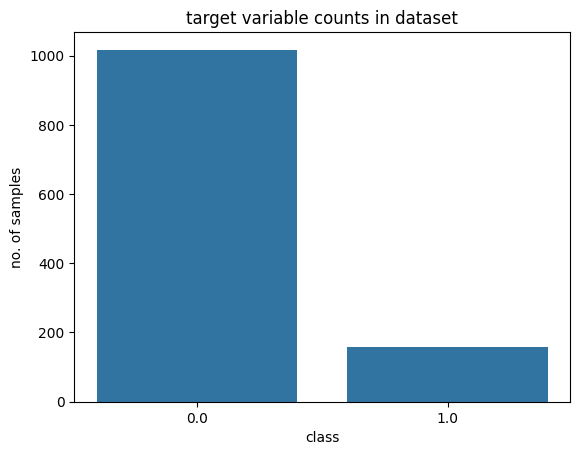

In [192]:
import seaborn as sns
#death=1, alive=0
(unique, counts) = np.unique(df_sampling['outcome'], return_counts=True)
print(unique,counts)
sns.barplot(x=unique, y=counts)
plt.xlabel("class")
plt.ylabel("no. of samples")
plt.title("target variable counts in dataset")
plt.plot()

In [193]:
df_stratified_sampling = df_sampling.copy()
# group by the outcome column (group for unique outcome)
grouped_df = df_stratified_sampling.groupby('outcome', group_keys=False)
# Apply stratified sampling within each group
# We sample a fraction (0.2 or 20%) of each group
stratified_sampled_df = grouped_df.apply(lambda x: x.sample(frac=0.2))
stratified_sampled_df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,Lactic acid,EF
951,0.0,0.7750,1,0.221806,1,1,0,1,1,0,...,0.245035,0.297628,0.561195,0.380749,0.406886,0.298795,0.224490,0.547320,0.140426,0.666667
483,0.0,0.2875,0,0.234848,0,1,0,1,0,0,...,0.214909,0.273904,0.555436,0.384314,0.486977,0.231325,0.204343,0.465958,0.204255,1.000000
809,0.0,0.3250,0,0.183812,1,0,0,0,1,0,...,0.213470,0.630841,0.632224,0.452941,0.437375,0.628916,0.402211,0.427839,0.172778,0.666667
915,0.0,0.8125,0,0.082513,1,0,0,0,0,0,...,0.091624,0.297897,0.650941,0.531092,0.546818,0.410241,0.192420,0.406293,0.114894,0.666667
340,0.0,0.8750,1,0.183812,1,0,0,0,0,1,...,0.121270,0.286382,0.667876,0.277124,0.649499,0.374050,0.267250,0.315690,0.140426,0.166667


In [194]:
print(f"The total number of Unique Subdivisions in the Dataset: {len(df_stratified_sampling['outcome'].unique())}")
print(f"Total Number of Items Sampled: {stratified_sampled_df['outcome'].value_counts().sum()}")
stratified_sampled_df['outcome'].value_counts()

The total number of Unique Subdivisions in the Dataset: 2
Total Number of Items Sampled: 235


0.0    203
1.0     32
Name: outcome, dtype: int64

# **Dimensionality Reduction**

*we will use Principal Component Analysis for our dataset, Linear Discriminant Analysis is another possible option*

**PCA (Principal Component Analysis)**

By reducing the dimensionality, PCA simplifies the data representation while retaining essential patterns and relationships.

In [195]:
df = stratified_sampled_df
pca_df = df.copy()
pca_df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,Lactic acid,EF
951,0.0,0.7750,1,0.221806,1,1,0,1,1,0,...,0.245035,0.297628,0.561195,0.380749,0.406886,0.298795,0.224490,0.547320,0.140426,0.666667
483,0.0,0.2875,0,0.234848,0,1,0,1,0,0,...,0.214909,0.273904,0.555436,0.384314,0.486977,0.231325,0.204343,0.465958,0.204255,1.000000
809,0.0,0.3250,0,0.183812,1,0,0,0,1,0,...,0.213470,0.630841,0.632224,0.452941,0.437375,0.628916,0.402211,0.427839,0.172778,0.666667
915,0.0,0.8125,0,0.082513,1,0,0,0,0,0,...,0.091624,0.297897,0.650941,0.531092,0.546818,0.410241,0.192420,0.406293,0.114894,0.666667
340,0.0,0.8750,1,0.183812,1,0,0,0,0,1,...,0.121270,0.286382,0.667876,0.277124,0.649499,0.374050,0.267250,0.315690,0.140426,0.166667


In [196]:
# Print the number of dimensions (columns) in the dataset, excluding the last column (target variable)
print(f"The Number of Dimensions in the Dataset: {len(pca_df.columns[:-1])}")

The Number of Dimensions in the Dataset: 45


In [197]:
# Extract the feature columnsby dropping outcome
X = pca_df.drop(['outcome'], axis = 1)
# Extract the target variable and store it in the array 'y'
y = pca_df['outcome']
X

,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,Lactic acid,EF
951,0.7750,1,0.221806,1,1,0,1,1,0,0,...,0.245035,0.297628,0.561195,0.380749,0.406886,0.298795,0.224490,0.547320,0.140426,0.666667
483,0.2875,0,0.234848,0,1,0,1,0,0,1,...,0.214909,0.273904,0.555436,0.384314,0.486977,0.231325,0.204343,0.465958,0.204255,1.000000
809,0.3250,0,0.183812,1,0,0,0,1,0,0,...,0.213470,0.630841,0.632224,0.452941,0.437375,0.628916,0.402211,0.427839,0.172778,0.666667
915,0.8125,0,0.082513,1,0,0,0,0,0,1,...,0.091624,0.297897,0.650941,0.531092,0.546818,0.410241,0.192420,0.406293,0.114894,0.666667
340,0.8750,1,0.183812,1,0,0,0,0,1,0,...,0.121270,0.286382,0.667876,0.277124,0.649499,0.374050,0.267250,0.315690,0.140426,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.7125,1,0.201080,1,0,1,1,0,1,0,...,0.587763,0.521495,0.423840,0.459516,0.406613,0.620964,0.307634,0.226744,0.070213,0.666667
314,0.8750,1,0.154668,1,1,0,1,0,0,0,...,0.262400,0.330218,0.535172,0.400000,0.464325,0.578849,0.228647,0.288190,0.136170,0.333333
355,0.6000,0,0.183812,0,1,0,0,0,0,0,...,0.215869,0.264019,0.541474,0.291765,0.514281,0.385542,0.314909,0.333168,0.146809,0.666667
531,0.8500,0,0.183177,1,0,0,1,0,0,0,...,0.345390,0.728972,0.557356,0.447059,0.514281,0.708434,0.224490,0.233926,0.229787,0.333333


In [198]:
from sklearn.decomposition import PCA
# PCA Initialization
# Create a PCA object with 3 components
pca = PCA(n_components = 3)

# Dimensionality Reduction
# Transform the original features into a new set of features (principal components)
X_train = pca.fit_transform(X)

# Get the proportion of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

In [199]:
print(f"The top 3 Variance Ratios are: {explained_variance}")

The top 3 Variance Ratios are: [0.14058289 0.13259481 0.09664484]


In [200]:
print(f"The Top 3 Eigenvectors are: {pca.components_}")

The Top 3 Eigenvectors are: [[ 5.79563992e-02 -5.91455280e-01 -2.29455411e-02  1.17377085e-01
   5.68262863e-01  6.39963648e-02 -9.66236376e-02 -3.78911137e-01
  -5.74000230e-02  2.97057739e-01  1.87437103e-01  2.16905476e-02
  -1.13426542e-02 -5.32452842e-02  5.48504198e-03 -2.38563485e-03
  -2.14878101e-02 -1.76893340e-02  1.49262295e-03  5.54005878e-02
   4.63048233e-02 -3.59599536e-03 -2.12546031e-02  4.39367644e-03
  -6.94729798e-03  8.21874855e-03 -1.72225452e-02  1.82399088e-02
  -3.24575717e-02  5.96169329e-02  5.47229464e-02  2.57926598e-02
   2.15718097e-04  1.25507019e-02  3.82398771e-02 -3.34597313e-02
   2.02397533e-02 -1.37711693e-02 -1.49628353e-03 -6.00614697e-03
   2.25610015e-02  2.65132450e-02 -1.92950316e-02  2.30083836e-03
  -4.46732090e-02]
 [ 6.76197597e-03  8.53109537e-02  9.26912124e-03  1.47121174e-01
  -6.42622718e-03  1.47053833e-02  5.06307607e-01  3.77073749e-01
   1.09008983e-01  3.82581157e-01  6.06432685e-01 -2.80868423e-02
  -4.66450922e-02  3.33257494

In [201]:
# Create a new dataset from principal components
df_afterpca = pd.DataFrame(data = X_train,
                  columns = ['PC1', 'PC2', 'PC3'])

target = pd.Series(y, name='outcome')
y.index=df_afterpca.index

result_df = pd.concat([df_afterpca, target], axis=1)
result_df.head(5)

,PC1,PC2,PC3,outcome
0,-0.277282,0.881831,0.541345,0.0
1,0.654992,-0.026000,0.499156,0.0
2,-0.128979,0.405318,-0.104268,0.0
3,0.364619,-0.389654,-0.854078,0.0
4,-0.542109,-0.515785,-0.273044,0.0


In [214]:
result_df.shape

(235, 4)

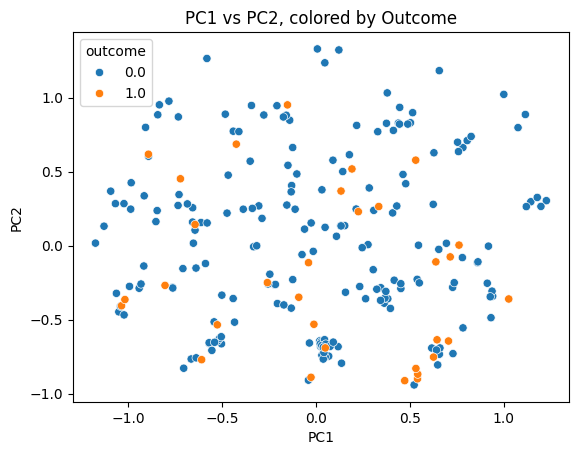

In [202]:
# @title PC1 vs PC2, colored by Outcome

import matplotlib.pyplot as plt
sns.scatterplot(data=result_df, x='PC1', y='PC2', hue='outcome')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2, colored by Outcome')
plt.show()

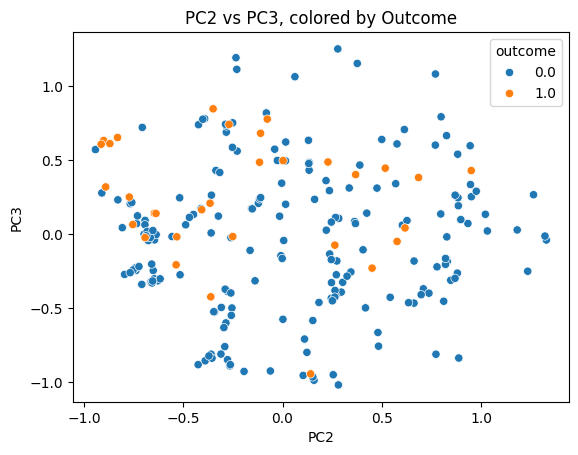

In [203]:
# @title PC2 vs PC3, colored by Outcome

import matplotlib.pyplot as plt
sns.scatterplot(data=result_df, x='PC2', y='PC3', hue='outcome')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs PC3, colored by Outcome')
plt.show()

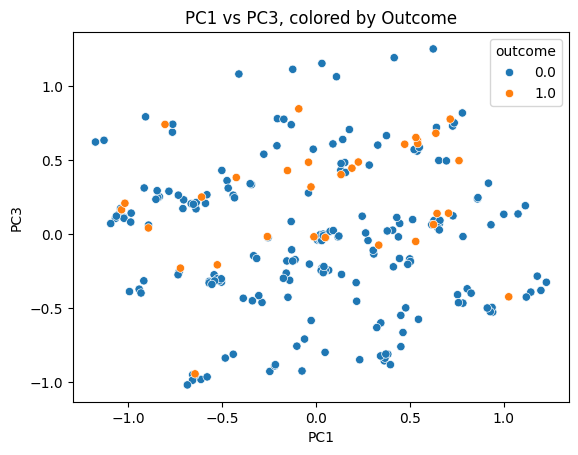

In [204]:
# @title PC1 vs PC3, colored by Outcome

import matplotlib.pyplot as plt
sns.scatterplot(data=result_df, x='PC1', y='PC3', hue='outcome')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3, colored by Outcome')
plt.show()

**LDA (Linear Discriminant Analysis)**

In [205]:
lda_df=df.copy()
lda_df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,Lactic acid,EF
951,0.0,0.7750,1,0.221806,1,1,0,1,1,0,...,0.245035,0.297628,0.561195,0.380749,0.406886,0.298795,0.224490,0.547320,0.140426,0.666667
483,0.0,0.2875,0,0.234848,0,1,0,1,0,0,...,0.214909,0.273904,0.555436,0.384314,0.486977,0.231325,0.204343,0.465958,0.204255,1.000000
809,0.0,0.3250,0,0.183812,1,0,0,0,1,0,...,0.213470,0.630841,0.632224,0.452941,0.437375,0.628916,0.402211,0.427839,0.172778,0.666667
915,0.0,0.8125,0,0.082513,1,0,0,0,0,0,...,0.091624,0.297897,0.650941,0.531092,0.546818,0.410241,0.192420,0.406293,0.114894,0.666667
340,0.0,0.8750,1,0.183812,1,0,0,0,0,1,...,0.121270,0.286382,0.667876,0.277124,0.649499,0.374050,0.267250,0.315690,0.140426,0.166667


In [206]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_lda = lda_df.drop(['outcome'], axis = 1)
y_lda = lda_df['outcome']

# Investigate the number of features in X_lda
print(f"Number of features in X_lda: {X_lda.shape[1]}")

#the number of classes in y_lda
print(f"Number of classes in y_lda: {len(y_lda.unique())}")

# setting n_components to a valid value
#Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=min(X_lda.shape[1], len(y_lda.unique()) - 1))
X_lda = lda.fit_transform(X_lda, y_lda)

X_lda.shape

Number of features in X_lda: 45
Number of classes in y_lda: 2


(235, 1)

# Sequential Feature Selection (Wrapper Selection)

In [207]:
sfs_df=df.copy()
sfs_df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,Lactic acid,EF
951,0.0,0.7750,1,0.221806,1,1,0,1,1,0,...,0.245035,0.297628,0.561195,0.380749,0.406886,0.298795,0.224490,0.547320,0.140426,0.666667
483,0.0,0.2875,0,0.234848,0,1,0,1,0,0,...,0.214909,0.273904,0.555436,0.384314,0.486977,0.231325,0.204343,0.465958,0.204255,1.000000
809,0.0,0.3250,0,0.183812,1,0,0,0,1,0,...,0.213470,0.630841,0.632224,0.452941,0.437375,0.628916,0.402211,0.427839,0.172778,0.666667
915,0.0,0.8125,0,0.082513,1,0,0,0,0,0,...,0.091624,0.297897,0.650941,0.531092,0.546818,0.410241,0.192420,0.406293,0.114894,0.666667
340,0.0,0.8750,1,0.183812,1,0,0,0,0,1,...,0.121270,0.286382,0.667876,0.277124,0.649499,0.374050,0.267250,0.315690,0.140426,0.166667


In [208]:
X_sfs = sfs_df.drop(['outcome'], axis = 1)
y_sfs = sfs_df['outcome']

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

logreg = LogisticRegression()

# Create a sequential feature selector
selector = SequentialFeatureSelector(
    logreg, n_features_to_select=2, scoring='accuracy')

# Fit the selector to the data
selector.fit(X, y)

# Get the selected features
selected_features = selector.get_support()

print('The selected features are:', list(X.columns[selected_features]))

The selected features are: ['age', 'gendera']


# Discretization

In [210]:
# equal frequency
def equifreq(arr1, m):
    a = len(arr1)
    n = int(a / m)
    for i in range(0, m):
        arr = []
        for j in range(i * n, (i + 1) * n):
            if j >= a:
                break
            arr = arr + [arr1[j]]
        print(arr)

In [213]:
# no of bins
m = 5

print("equal frequency binning")
equifreq(result_df['PC1'].values, m)

equal frequency binning
[-0.2772817958017672, 0.6549915829999656, -0.12897947276995342, 0.3646188788213822, -0.5421092492168404, 1.1162285188326542, 0.14325969928188093, 0.068416655597494, 0.9195325131317605, 0.5001396284053865, 0.008109470974956819, -0.5882203246752983, -0.7643110543343676, 0.13282729577015784, 0.34591177049172367, -0.612263635312085, 0.7806449262395878, -0.13950007448291477, 0.04116810313773116, 0.032135693764294794, -0.3868372013086356, -0.07376523734461135, -0.9930522297724508, -0.8337772318607864, -0.10129127263818173, 0.4090976393697308, 0.3762511570289431, -0.891553908247259, -1.0497998387911218]
[-0.916716478332875, -0.3316723992358512, 0.7834096614708679, -0.20741887494573133, -0.2452118069532789, -1.128780340535812, -0.1578852581180214, 0.02844461596171097, 0.5397419976875755, -0.02511467927516616, -0.5009687194857438, 1.1452093784974342, 0.28446316602578536, 1.2280951773358697, 0.03214682318267861, 0.04779852679906075, 0.9330992465841491, 0.02056981452737203

# Binarization

Binarization is a process used in the conversion of data into two distinct classes or categories, typically represented as 0s and 1s.

Generally used to convert categorical data into 0 and 1, if there are m categories then we add log2m colums to the data

it is a special case of discretization


#Dividing into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X = result_df.drop(['outcome'], axis = 1)
y = result_df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#now we can use X_trai,Y_train to train our model